In [285]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.simplefilter(action="ignore",category="UserWarning")


# Project
## Used Car Price Prediction Analysis With EDA

In [286]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\used_car_price_dataset_extended.csv")

In [287]:
df.head()

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid
0,2001,8.17,4000,Petrol,4,8587.64,Chevrolet,Manual,White,NaN,0,No
1,2014,17.59,1500,Petrol,4,5943.50,Honda,Manual,Black,NaN,0,Yes
2,2023,18.09,2500,Diesel,5,9273.58,BMW,Automatic,Black,Full,1,Yes
3,2009,11.28,800,Petrol,1,6836.24,Hyundai,Manual,Blue,Full,0,Yes
4,2005,12.23,1000,Petrol,2,4625.79,Nissan,Automatic,Red,Full,0,Yes


## Data Info

In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   make_year           10000 non-null  int64  
 1   mileage_kmpl        10000 non-null  float64
 2   engine_cc           10000 non-null  int64  
 3   fuel_type           10000 non-null  object 
 4   owner_count         10000 non-null  int64  
 5   price_usd           10000 non-null  float64
 6   brand               10000 non-null  object 
 7   transmission        10000 non-null  object 
 8   color               10000 non-null  object 
 9   service_history     7962 non-null   object 
 10  accidents_reported  10000 non-null  int64  
 11  insurance_valid     10000 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 937.6+ KB


In [289]:
df.shape

(10000, 12)

## Data Handling & Cleaning

In [290]:
df.isna().sum()
df.duplicated().sum()

np.int64(0)

In [291]:
df["service_history"]=df["service_history"].fillna("Unreported") # Filling nan values

In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   make_year           10000 non-null  int64  
 1   mileage_kmpl        10000 non-null  float64
 2   engine_cc           10000 non-null  int64  
 3   fuel_type           10000 non-null  object 
 4   owner_count         10000 non-null  int64  
 5   price_usd           10000 non-null  float64
 6   brand               10000 non-null  object 
 7   transmission        10000 non-null  object 
 8   color               10000 non-null  object 
 9   service_history     10000 non-null  object 
 10  accidents_reported  10000 non-null  int64  
 11  insurance_valid     10000 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 937.6+ KB


## EDA & Visualization

### Oldest manufactured cars and the price they got sold

In [293]:
# the indices of the 50 smallest values in 'make_year'
smallest_indices = df["make_year"].nsmallest(50).index

# indices to get all columns for those rows
classifi_old = df.loc[smallest_indices].reset_index()

# Or alternatively, sort the entire DataFrame and take the first 50 rows
classifi_old = df.sort_values("make_year").head(50).reset_index()
classifi_old

,index,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid
0,830,1995,21.99,800,Petrol,2,3688.31,Volkswagen,Manual,Blue,Partial,1,Yes
1,821,1995,15.75,1200,Petrol,1,2976.33,Volkswagen,Automatic,White,Full,1,Yes
2,858,1995,20.30,1500,Diesel,3,4823.72,Tesla,Manual,Black,Unreported,1,Yes
3,9667,1995,9.71,4000,Petrol,4,4205.88,Ford,Automatic,Black,Full,0,Yes
4,9668,1995,11.37,1200,Electric,5,6081.13,BMW,Manual,Silver,Full,1,Yes
5,9632,1995,17.77,5000,Petrol,5,7778.78,Honda,Manual,Silver,Full,2,No
6,9642,1995,21.46,800,Diesel,5,1389.17,Volkswagen,Manual,Silver,Unreported,1,Yes
7,9628,1995,6.33,5000,Diesel,3,6843.54,Hyundai,Manual,Blue,Full,0,Yes
8,9607,1995,23.43,800,Diesel,4,3496.22,Toyota,Manual,Black,Full,0,Yes
9,9777,1995,26.52,1800,Petrol,2,6448.10,Volkswagen,Automatic,Black,Full,1,Yes


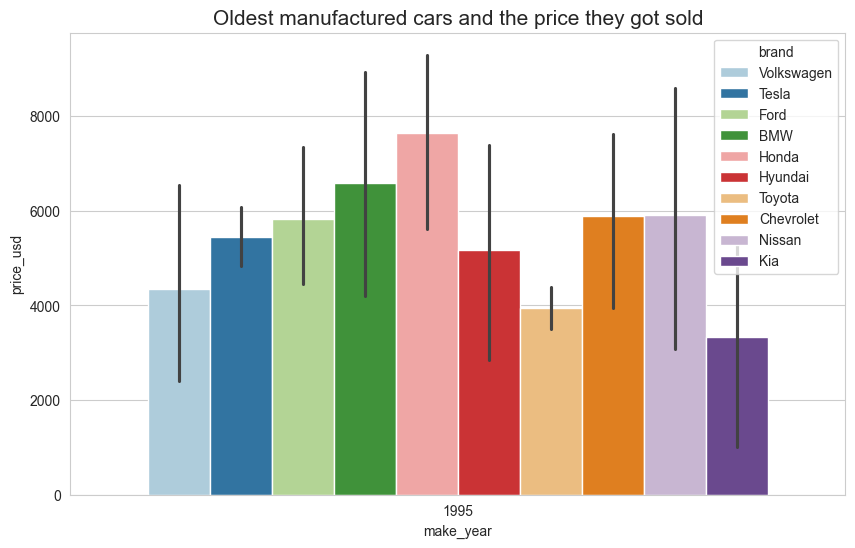

In [294]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.barplot(data=classifi_old,x="make_year",y="price_usd",hue="brand",palette="Paired")
plt.title("Oldest manufactured cars and the price they got sold",fontsize=15)
plt.show()

### Year Distribution

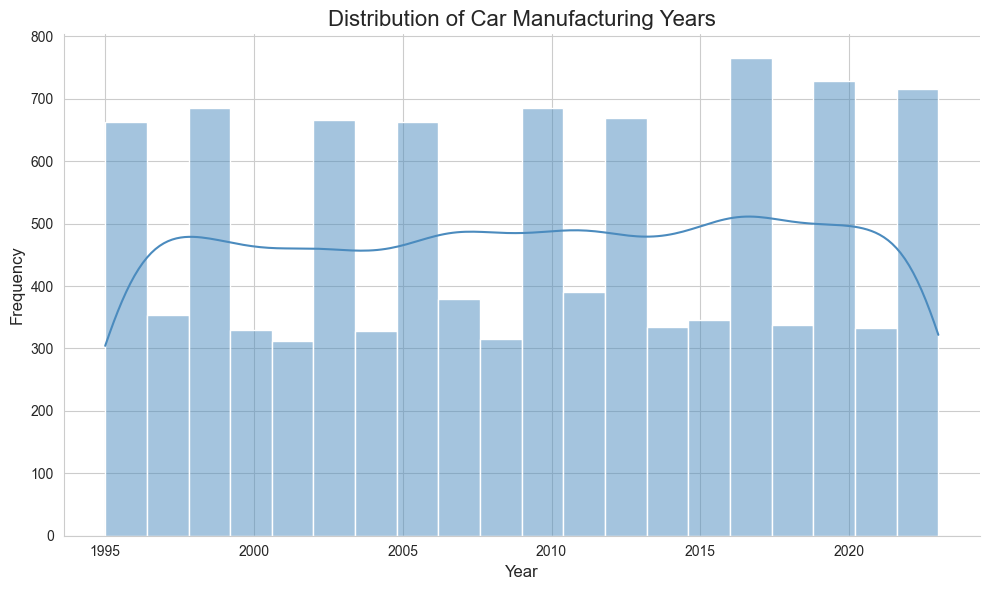

In [295]:
plt.figure(figsize=(10, 6))
sns.histplot(df["make_year"], bins=20, kde=True, color="#4B8BBE")

# Customizations
plt.title("Distribution of Car Manufacturing Years", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
sns.despine()

plt.tight_layout()
plt.show()

### Highest Mileage Cars And The Price They Got Sold

In [296]:
highest_ml=df["mileage_kmpl"].nlargest(50).index
highest_ml_loc=df.loc[highest_ml]
highest_ml_loc


,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid
4679,2017,35.00,2000,Petrol,3,8381.61,Volkswagen,Automatic,Black,Full,0,Yes
3919,2006,34.99,3000,Diesel,2,9148.70,Ford,Automatic,Gray,Full,0,Yes
9248,2019,34.50,2500,Petrol,2,12044.50,Toyota,Manual,Blue,Partial,1,Yes
3082,1998,34.38,2500,Diesel,2,6568.51,BMW,Manual,Red,Partial,2,Yes
1636,2014,34.20,2500,Diesel,2,8275.85,Ford,Manual,Red,Full,1,Yes
4524,2009,33.75,1200,Petrol,4,6463.38,Honda,Manual,Black,Partial,1,Yes
6988,1998,33.52,4000,Diesel,5,9852.99,Kia,Automatic,Silver,Unreported,0,Yes
1422,1995,33.45,5000,Petrol,2,11062.77,Chevrolet,Manual,White,Full,0,No
7198,2002,33.44,5000,Electric,1,16886.44,Volkswagen,Manual,Silver,Full,1,Yes
7369,2021,33.34,2500,Diesel,3,10582.00,Tesla,Manual,Black,Unreported,0,Yes


In [297]:
fig=px.bar(highest_ml_loc,x="engine_cc",y="price_usd",color="mileage_kmpl",title="Highest Mileage Cars And The Price They Got Sold",barmode="group")
fig.show()


## Histplot Distribution

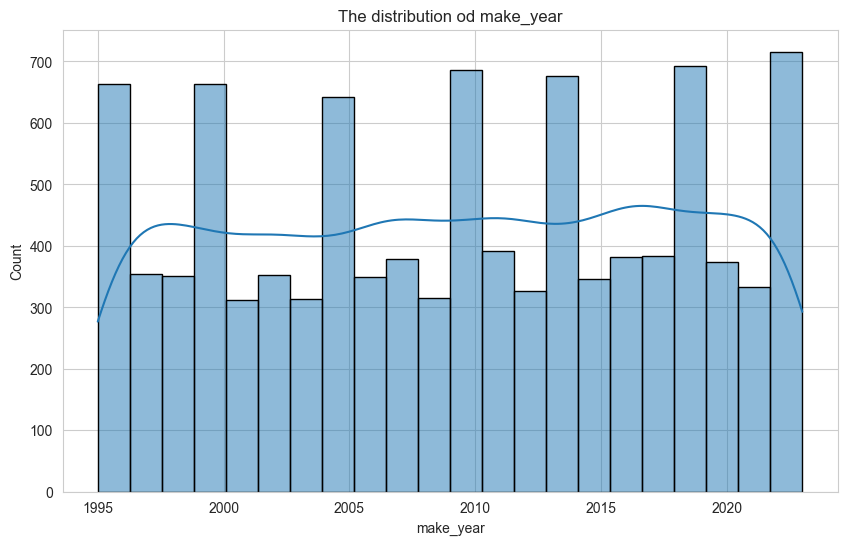

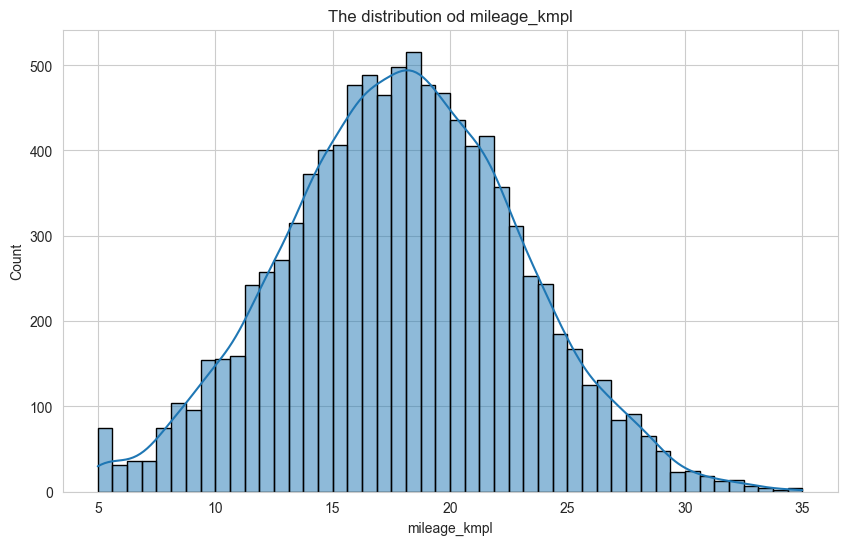

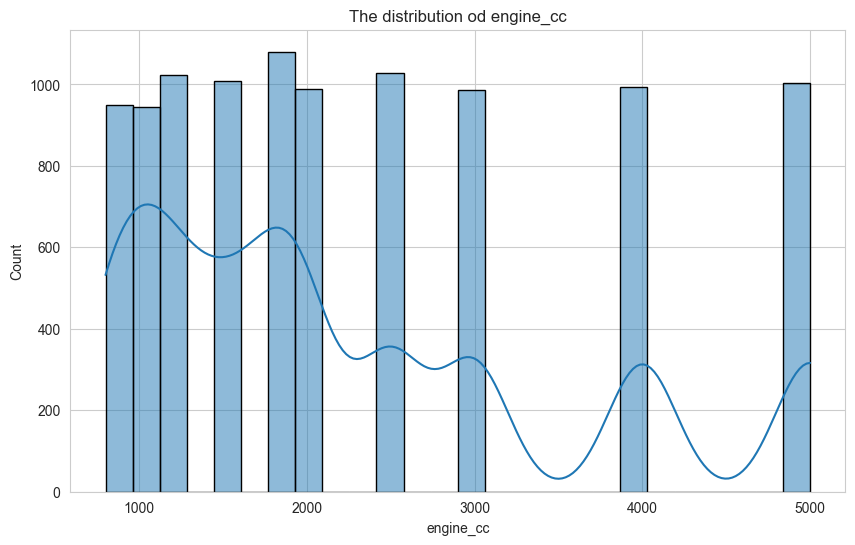

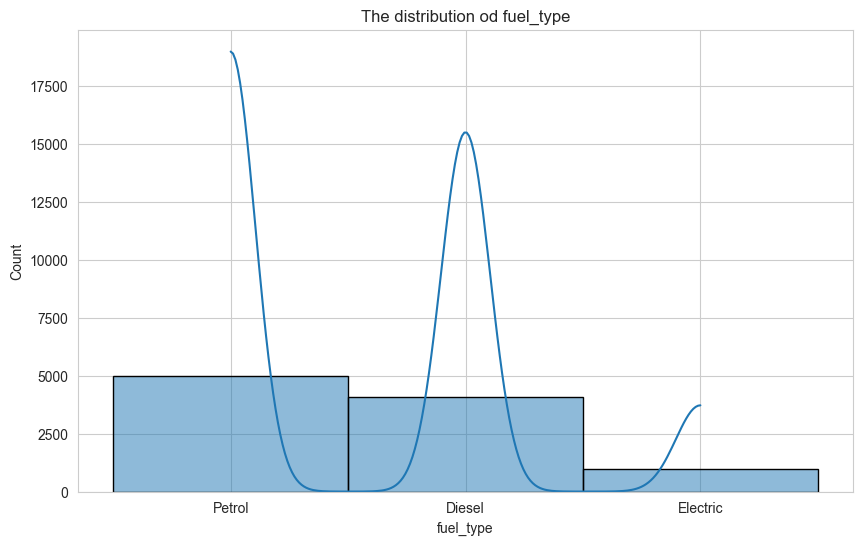

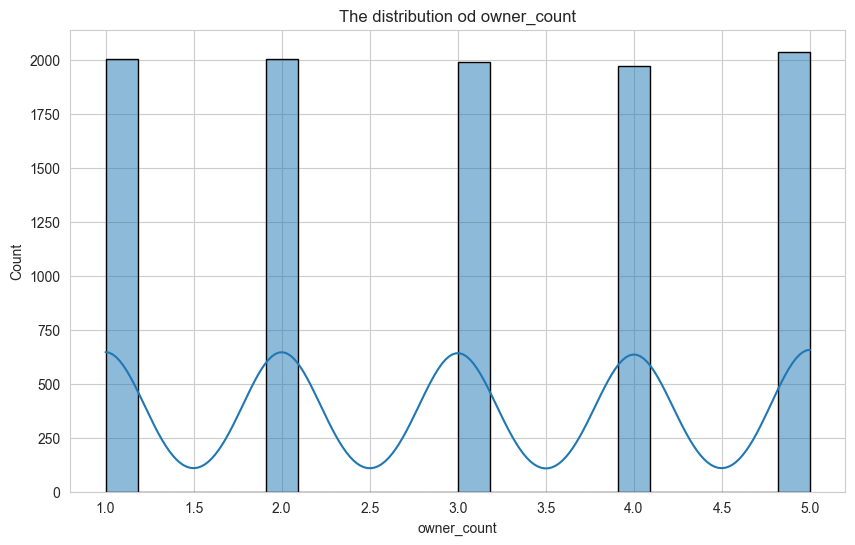

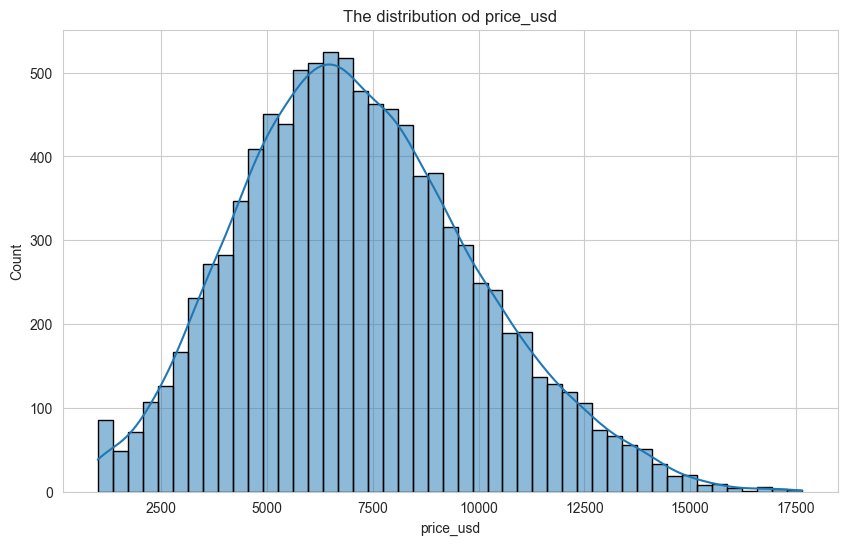

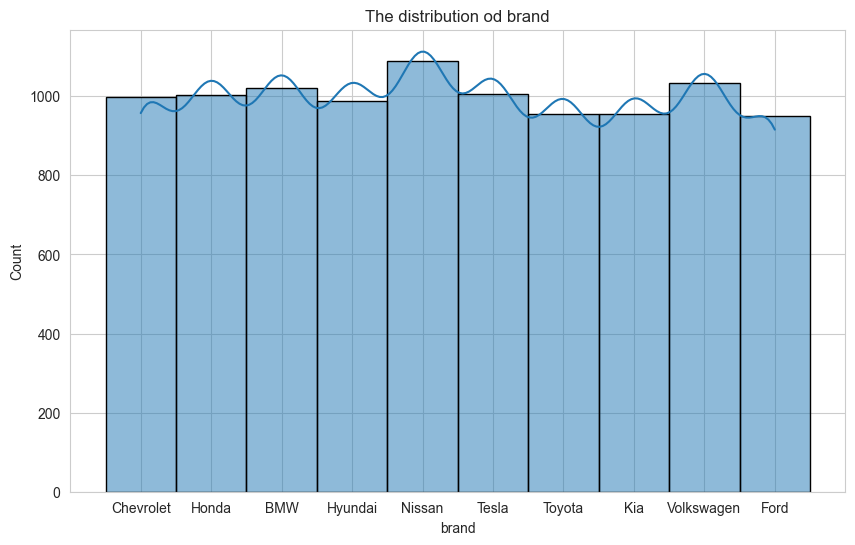

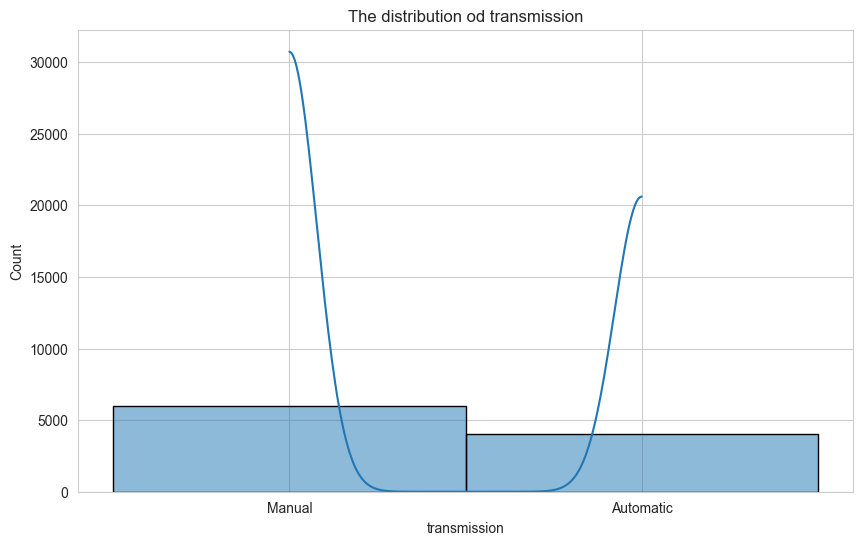

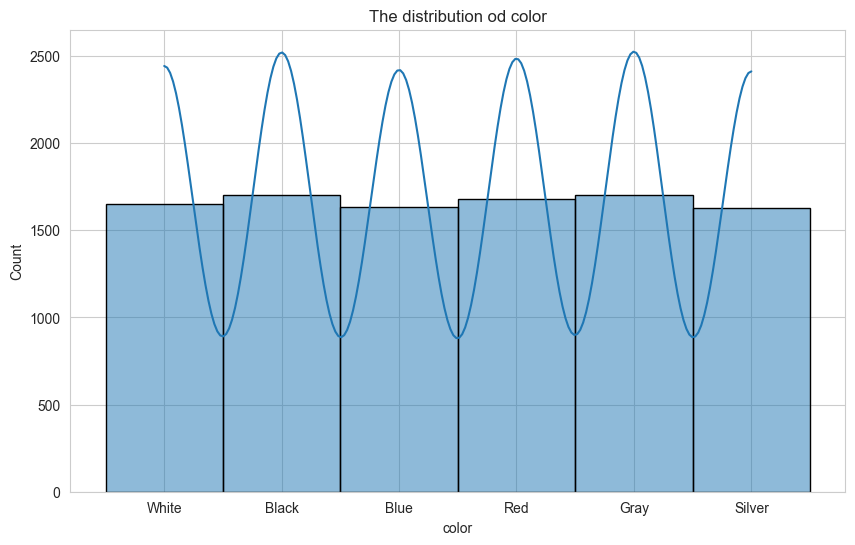

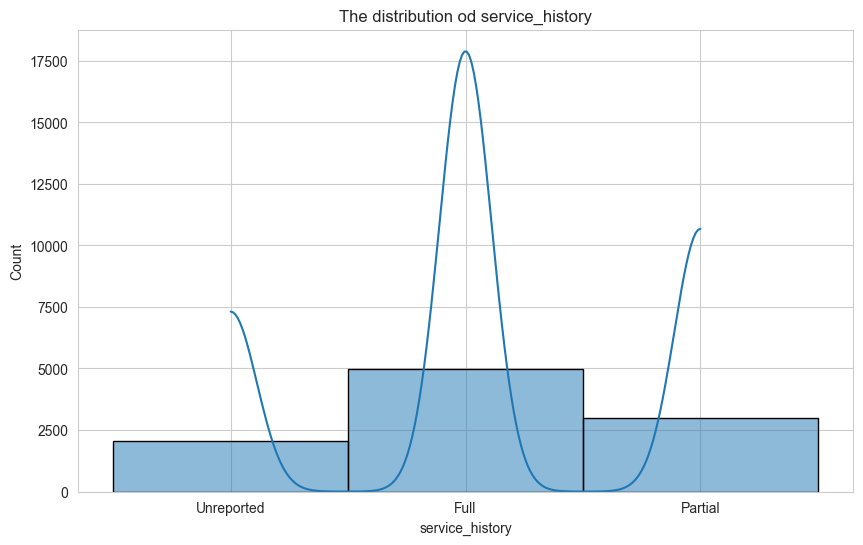

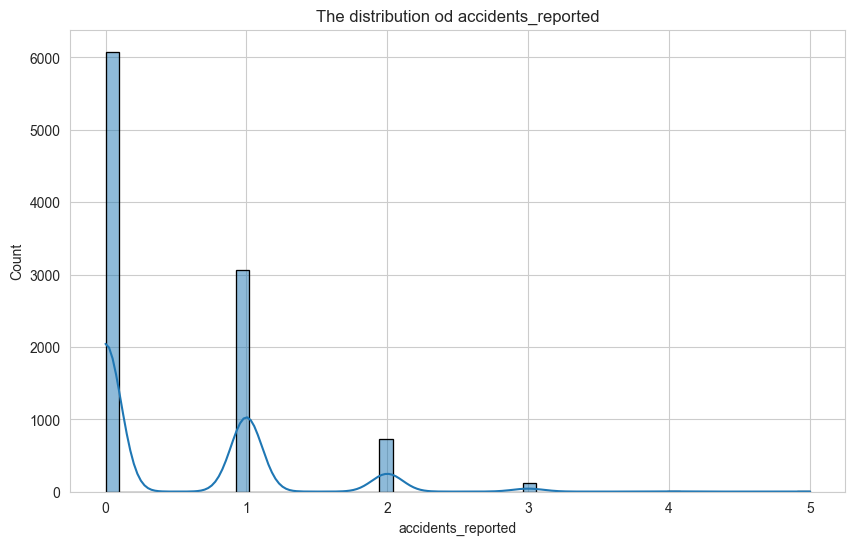

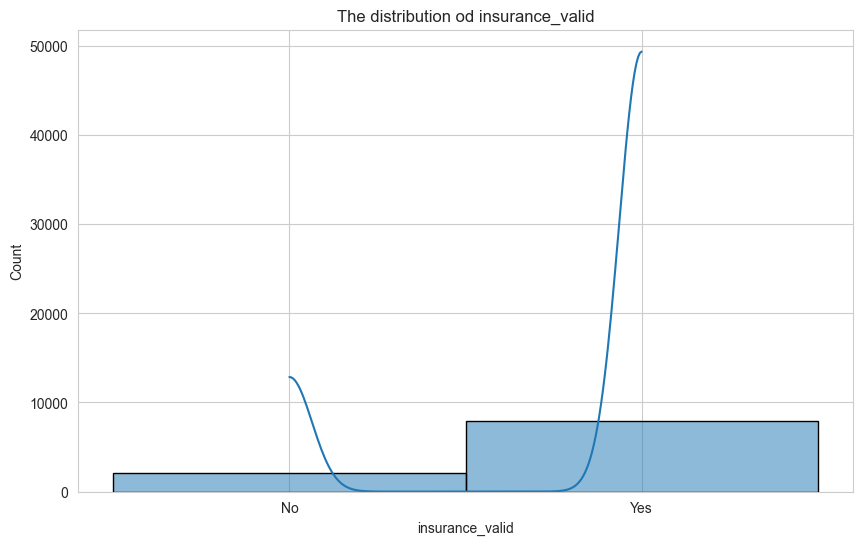

In [298]:
for xo in df:
    plt.figure(figsize=(10,6))
    sns.histplot(data=df,x=xo,kde=True,edgecolor="black")
    plt.title(f"The distribution od {xo}")
    plt.show()

## Correlation Heatmap

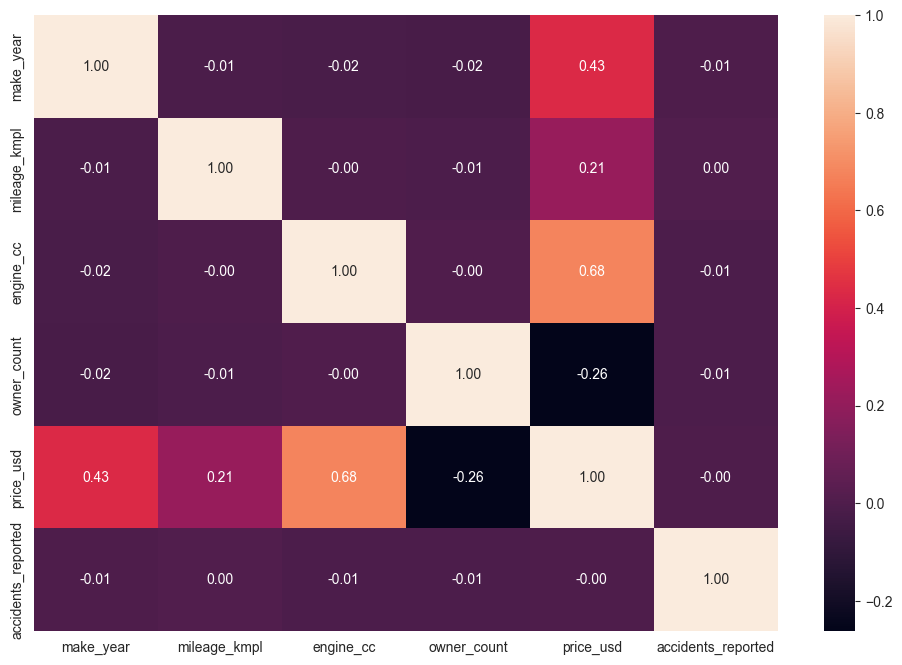

In [299]:
cor=df.select_dtypes(include="number").corr()
plt.figure(figsize=(12,8))
sns.heatmap(data=cor,annot=True,fmt=".2f")
plt.show()

### Highest price sold out vechile by brand

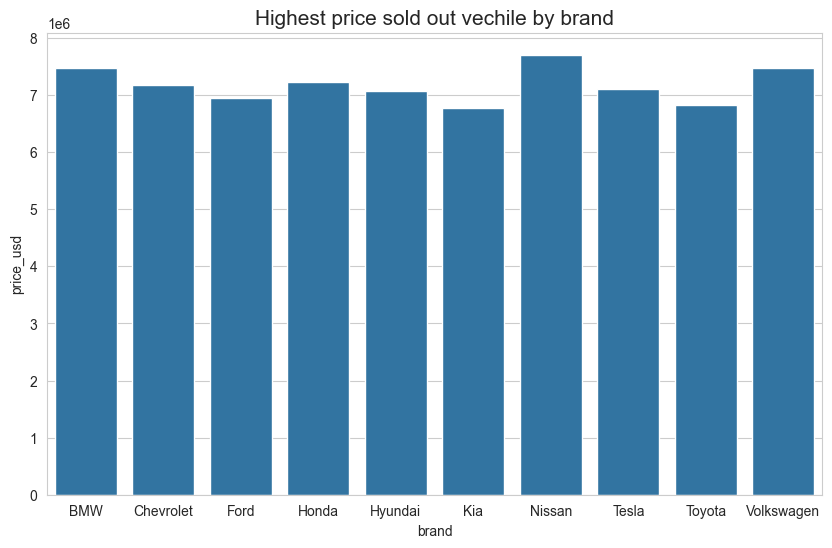

In [300]:
classifi_pr=df.groupby("brand")["price_usd"].sum().reset_index()
classifi_pr
plt.figure(figsize=(10,6))
sns.barplot(data=classifi_pr,x="brand",y="price_usd")
plt.title("Highest price sold out vechile by brand",fontsize=15)
plt.show()

## Machine Learning

In [301]:
df.head()

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid
0,2001,8.17,4000,Petrol,4,8587.64,Chevrolet,Manual,White,Unreported,0,No
1,2014,17.59,1500,Petrol,4,5943.50,Honda,Manual,Black,Unreported,0,Yes
2,2023,18.09,2500,Diesel,5,9273.58,BMW,Automatic,Black,Full,1,Yes
3,2009,11.28,800,Petrol,1,6836.24,Hyundai,Manual,Blue,Full,0,Yes
4,2005,12.23,1000,Petrol,2,4625.79,Nissan,Automatic,Red,Full,0,Yes


In [302]:
le=LabelEncoder()
for col in df.select_dtypes(include="object"):
    df[col]=le.fit_transform(df[col])

In [303]:
df.head()

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid
0,2001,8.17,4000,2,4,8587.64,1,1,5,2,0,0
1,2014,17.59,1500,2,4,5943.50,3,1,0,2,0,1
2,2023,18.09,2500,0,5,9273.58,0,0,0,0,1,1
3,2009,11.28,800,2,1,6836.24,4,1,1,0,0,1
4,2005,12.23,1000,2,2,4625.79,6,0,3,0,0,1


In [304]:
scaler=StandardScaler()
scaled_features=scaler.fit_transform(df.drop("price_usd",axis=1))
x = pd.DataFrame(scaled_features, columns=df.drop("price_usd", axis=1).columns)
y = df["price_usd"]

In [305]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [306]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [307]:
y_pred=model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 1736536.374757651
R² Score: 0.7817193750519489


In [308]:
df.head()

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid
0,2001,8.17,4000,2,4,8587.64,1,1,5,2,0,0
1,2014,17.59,1500,2,4,5943.50,3,1,0,2,0,1
2,2023,18.09,2500,0,5,9273.58,0,0,0,0,1,1
3,2009,11.28,800,2,1,6836.24,4,1,1,0,0,1
4,2005,12.23,1000,2,2,4625.79,6,0,3,0,0,1


## Adding New Data To Predict

In [314]:
new_data_dict = {
    'make_year': 2001,
    "mileage_kmpl":12.00,
    "engine_cc":500,
    "fuel_type":0,
    "owner_count":2,
    "brand":3,
    "transmission":1,
    "color":2,
    "service_history":2,
    "accidents_reported":1,
    "insurance_valid":0
}



# Step 2: Convert to DataFrame
import pandas as pd
new_data = pd.DataFrame([new_data_dict])


# Step 5: Predict
predicted_price = model.predict(new_data)
print("Predicted price for the new car: ${:.2f}".format(predicted_price[0]))



Predicted price for the new car: $3428984.82
